# Small Dataset - 15C

Silicon Current vs Silicon Temperature

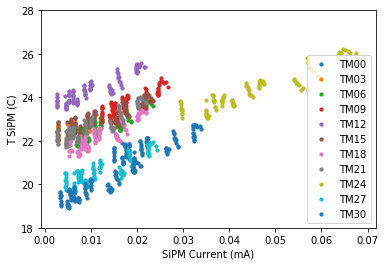

In [12]:
#%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

fig = plt.figure(1, figsize=(6,4))
ax1 = fig.add_subplot(1,1,1)
plot_list_ax1 = []

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

specific=0
if specific==1:
    plt.scatter(data['SiPM_I_TM00'],data['T_SIPM_TM00'], label='TM0')
    plt.scatter(data['SiPM_I_TM03'],data['T_SIPM_TM03'], label='TM3')
    plt.scatter(data['SiPM_I_TM06'],data['T_SIPM_TM06'], label='TM6')
    plt.scatter(data['SiPM_I_TM09'],data['T_SIPM_TM09'], label='TM9')
    plt.scatter(data['SiPM_I_TM12'],data['T_SIPM_TM12'], label='TM12')
    plt.scatter(data['SiPM_I_TM15'],data['T_SIPM_TM15'], label='TM15')
    plt.scatter(data['SiPM_I_TM18'],data['T_SIPM_TM18'], label='TM18')
    plt.scatter(data['SiPM_I_TM21'],data['T_SIPM_TM21'], label='TM21')
    plt.scatter(data['SiPM_I_TM24'],data['T_SIPM_TM24'], label='TM24')
    plt.scatter(data['SiPM_I_TM28'],data['T_SIPM_TM28'], label='TM28')
if specific ==0:
    for d in range (0,11):
        di=3*d
        x=data['SiPM_I_TM%02i' % di]
        y=data['T_SIPM_TM%02i' % di]
        plt.scatter(x,y, s=10, label='TM%02i' % di)

plt.xlabel('SiPM Current (mA)')
plt.ylabel('T SiPM (C)')
plt.ylim(18,28)
plt.legend(loc='best')
plt.show()
plt.close()

Temperature per TM per time stamp

0 seconds


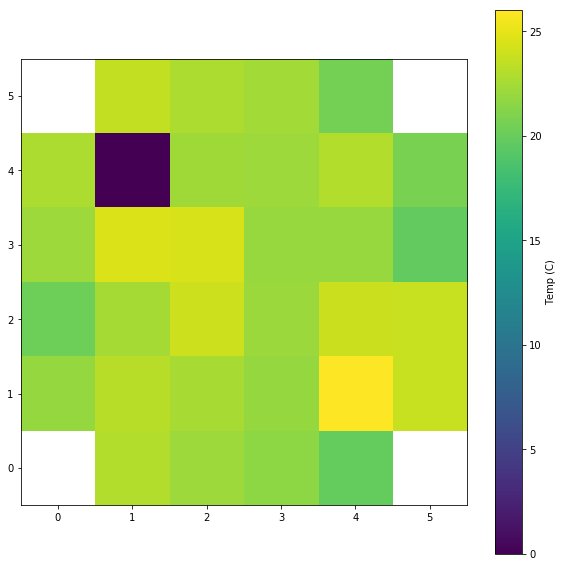

100 seconds


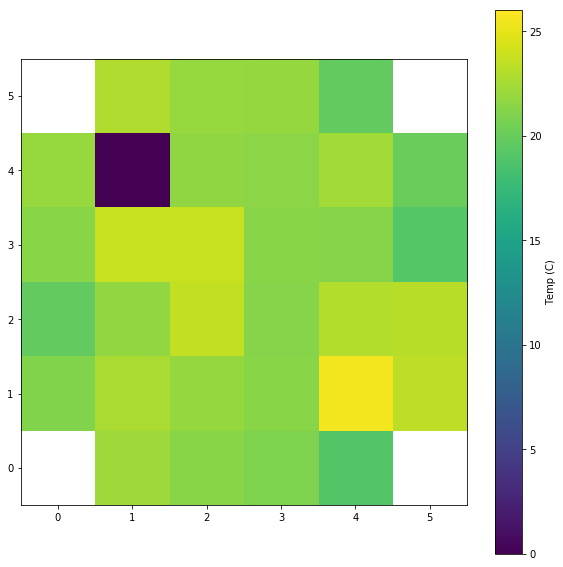

200 seconds


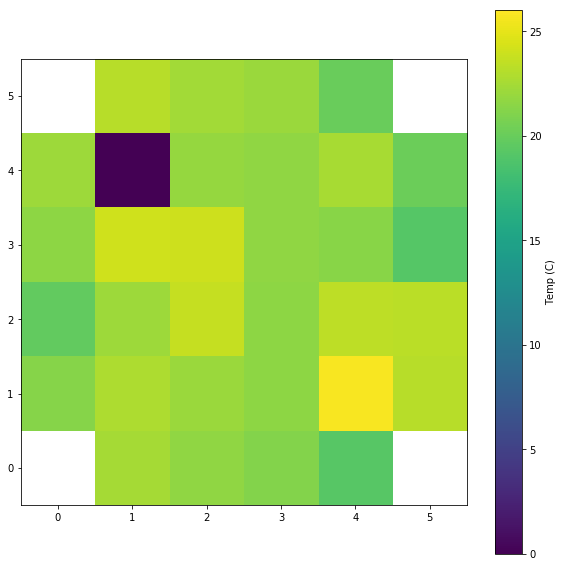

300 seconds


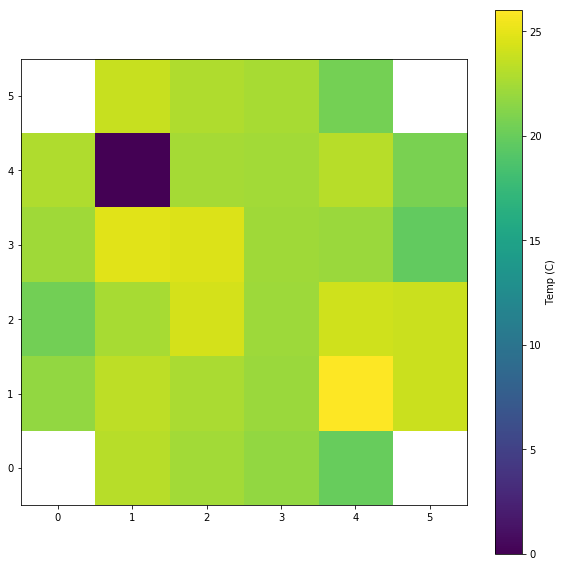

400 seconds


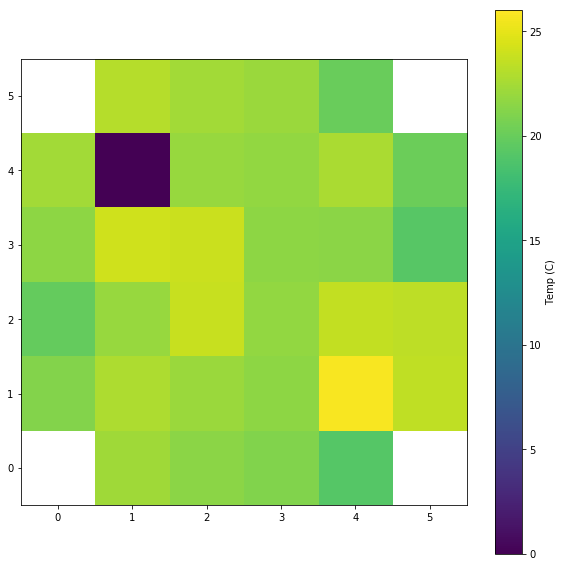

500 seconds


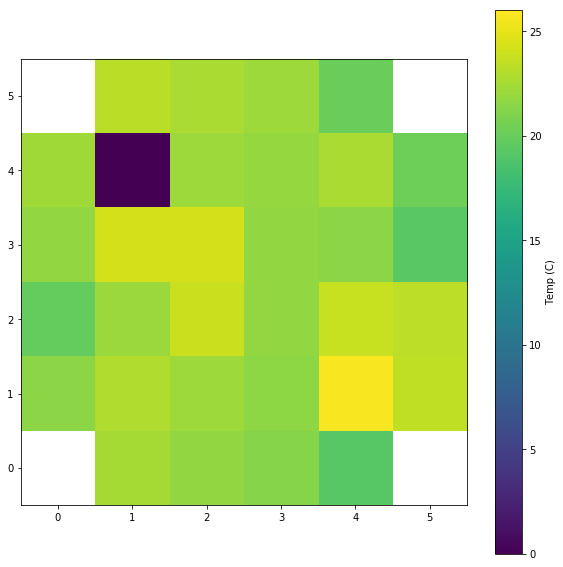

600 seconds


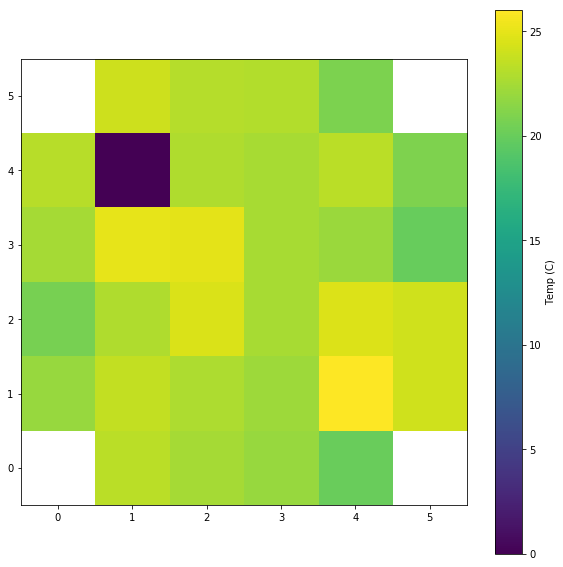

700 seconds


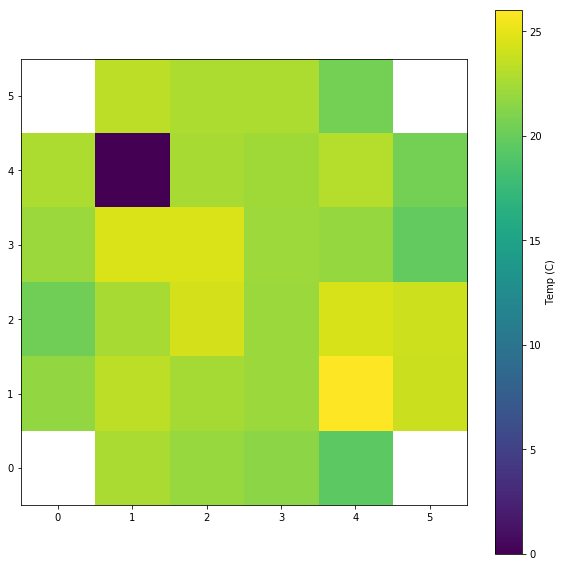

800 seconds


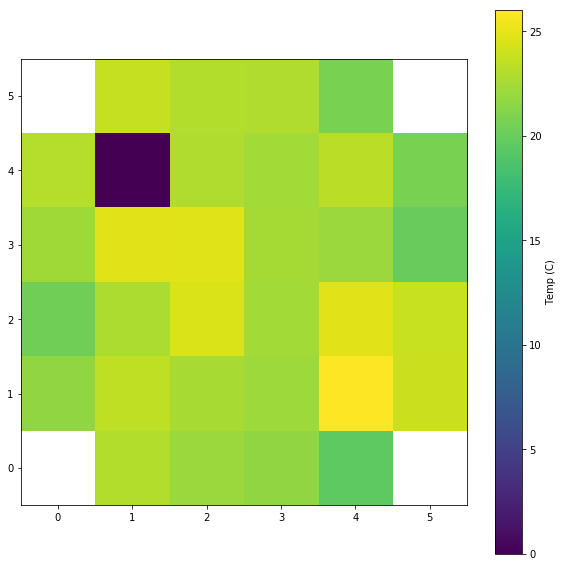

900 seconds


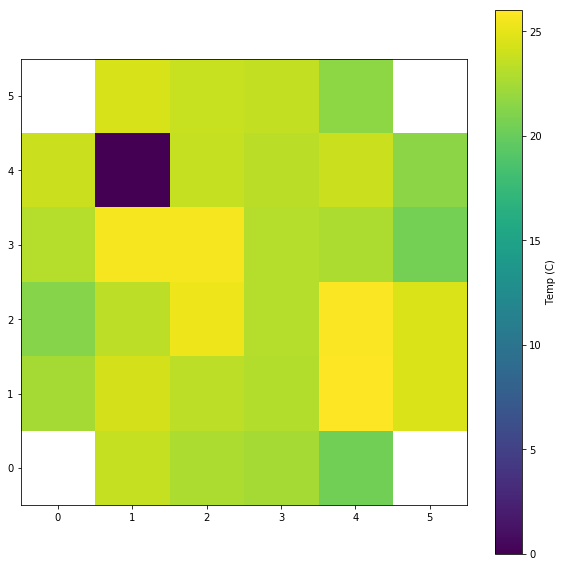

1000 seconds


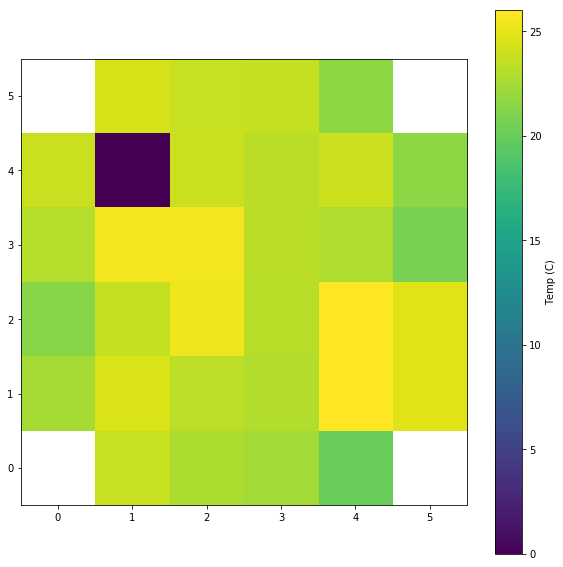

In [24]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import shutil
import re
import threading
from datetime import datetime
import shutil
import pandas as pd

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

toncam=1
if toncam==1:
    # =============================================================================
    # ## PRINTING OUT TEMPERATURE ON CAMERA
    # =============================================================================
    for t in range (0,11):
        ti=10*t
        print(10*ti, 'seconds')
        tzero=np.zeros(32,)
        image=np.ma.zeros((6,6))
        for d in range (0,32):
            tzero[d]=data['T_SIPM_TM%02i' % d][ti]       #Si 23 Hotter
            #tzero[d]=data['T_PRI_TM%02i' % d][ti]       #PRIMARY 28 VERY HOT 
            #tzero[d]=data['T_AUX_TM%02i' % d][ti]       #AUX 28 VERY HOT
            #tzero[d]=data['SiPM_I_TM%02i' % d][ti]      #TM24 Current V High (comment out boundaries to get the scale)   
                                                        # HV DAC set to 55 in cfg not 255
        image[0,1]=tzero[0]    
        image[0,2]=tzero[1]
        image[0,3]=tzero[2]
        image[0,4]=tzero[3]
        image[1,0]=tzero[4]
        image[1,1]=tzero[5]#0#tzero[8]
        image[1,2]=tzero[6]
        image[1,3]=tzero[7]
        image[1,4]=0#tzero[8]
        image[1,5]=tzero[9]
        image[2,0]=tzero[10]
        image[2,1]=tzero[11]
        image[2,2]=tzero[12]
        image[2,3]=tzero[13]
        image[2,4]=tzero[14]
        image[2,5]=tzero[15]
        image[3,0]=tzero[16]
        image[3,1]=tzero[17]
        image[3,2]=tzero[18]
        image[3,3]=tzero[19]
        image[3,4]=tzero[20]
        image[3,5]=tzero[21]
        image[4,0]=tzero[22]
        image[4,1]=tzero[23]
        image[4,2]=tzero[24]
        image[4,3]=tzero[25]
        image[4,4]=tzero[26]
        image[4,5]=tzero[27]
        image[5,1]=tzero[28]    
        image[5,2]=tzero[29]
        image[5,3]=tzero[30]
        image[5,4]=tzero[31]
        image=image.transpose()
        
        image[0, 0] = np.ma.masked       # Ensure no events where there are no TMs
        image[5, 5] = np.ma.masked
        image[5, 0] = np.ma.masked
        image[0, 5] = np.ma.masked
        
        fig = plt.figure(figsize=(10, 10))     # size of plot
        ax = fig.add_subplot(111)              # size of overall image
        im = ax.imshow(image, origin='lower')
        fig.colorbar(im, label='Temp (C)')#,boundaries=[0,5,10,15,20,25,30,35,40,45,50,55,60])
        im.set_clim(0,26)
        plt.show()
        plt.close()

Temperature per TM over time
Sinsusoidal relationship with time, long term average increases with time (and hence NSB)


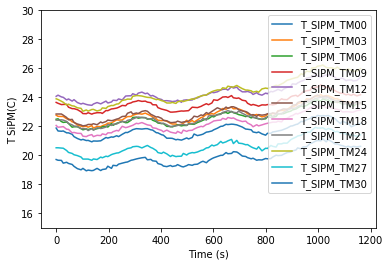

In [26]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

#print(data['T_AMBIENT'],data['T_SET'],data['T_WATER_IN'])

#T_SIPM_TM31, data['SiPM_I_TM%02i' % tm], T_PRI_TMxx, T_AUX_TMxx 

#plt.plot(data['totdt'],data['T_SIPM_TM31'], label='$T_{Water In}$')
print ('Temperature per TM over time')
print ('Sinsusoidal relationship with time, long term average increases with time (and hence NSB)')
for tm in range (0,11):
    tma=3*tm
    plt.plot(data['totdt'],data['T_SIPM_TM%02i' % tma])#data['T_SIPM_TM31'])#, label='$T_{Water Out}$')
plt.xlabel('Time (s)')
plt.ylim(15,30)
#plt.xlim(0,5)
plt.ylabel('T SiPM(C)')
plt.legend(loc='upper right')
plt.show()
plt.close()


Water In and Water Out temp over time


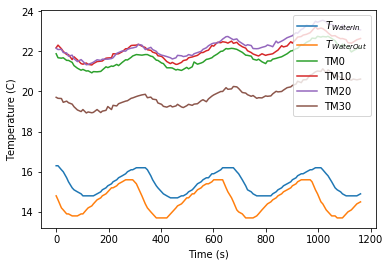

In [31]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd
'''
#fig = plt.figure(1, figsize=(12,8))
fig = plt.figure(1, figsize=(6,4))
ax1 = fig.add_subplot(1,1,1)
#ax1 = fig.add_subplot(2,2,1)
#ax2 = fig.add_subplot(2,2,2)
#ax3 = fig.add_subplot(2,2,3)
#ax4 = fig.add_subplot(2,2,4)
plot_list_ax1 = []
#plot_list_ax2 = []
#plot_list_ax3 = []
#plot_list_ax4 = []
'''

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

#print(data['T_AMBIENT'],data['T_SET'],data['T_WATER_IN'])
'''
for i in range (0,len(cam_items)):
    for j in range (0,len(cam_items)):
        if i!=j:
            plt.scatter(data[cam_items[i]],data[cam_items[j]])
            plt.xlabel(cam_items[i])
            plt.ylabel(cam_items[j])
            plt.show()
            plt.close()

for i in range (0,len(cam_items)):
    plt.scatter(data['totdt'],data[cam_items[i]])
    plt.xlabel('Time (s)')
    plt.ylabel(cam_items[i])
    plt.show()
    plt.close()
'''
print('Water In and Water Out temp over time')
plt.plot(data['totdt'],data['T_WATER_IN'], label='$T_{Water In}$')
plt.plot(data['totdt'],data['T_WATER_OUT'], label='$T_{Water Out}$')
plt.plot(data['totdt'],data['T_SIPM_TM00'], label='TM0')
plt.plot(data['totdt'],data['T_SIPM_TM10'], label='TM10')
plt.plot(data['totdt'],data['T_SIPM_TM20'], label='TM20')
plt.plot(data['totdt'],data['T_SIPM_TM30'], label='TM30')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend(loc='upper right')
plt.show()
plt.close()

#T_SIPM_TM31, data['SiPM_I_TM%02i' % tm], T_PRI_TMxx, T_AUX_TMxx 




Water In and Water Out temp over time


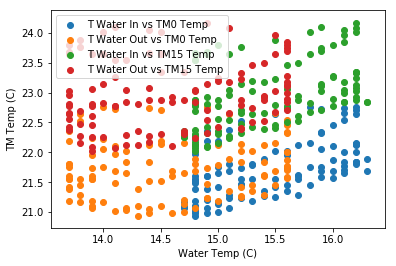

In [34]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd
'''
#fig = plt.figure(1, figsize=(12,8))
fig = plt.figure(1, figsize=(6,4))
ax1 = fig.add_subplot(1,1,1)
#ax1 = fig.add_subplot(2,2,1)
#ax2 = fig.add_subplot(2,2,2)
#ax3 = fig.add_subplot(2,2,3)
#ax4 = fig.add_subplot(2,2,4)
plot_list_ax1 = []
#plot_list_ax2 = []
#plot_list_ax3 = []
#plot_list_ax4 = []
'''

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

#print(data['T_AMBIENT'],data['T_SET'],data['T_WATER_IN'])
'''
for i in range (0,len(cam_items)):
    for j in range (0,len(cam_items)):
        if i!=j:
            plt.scatter(data[cam_items[i]],data[cam_items[j]])
            plt.xlabel(cam_items[i])
            plt.ylabel(cam_items[j])
            plt.show()
            plt.close()

for i in range (0,len(cam_items)):
    plt.scatter(data['totdt'],data[cam_items[i]])
    plt.xlabel('Time (s)')
    plt.ylabel(cam_items[i])
    plt.show()
    plt.close()
'''
print('Water In and Water Out temp over time')
plt.scatter(data['T_WATER_IN'], data['T_SIPM_TM00'], label='T Water In vs TM0 Temp')
plt.scatter(data['T_WATER_OUT'], data['T_SIPM_TM00'], label='T Water Out vs TM0 Temp')
plt.scatter(data['T_WATER_IN'], data['T_SIPM_TM15'], label='T Water In vs TM15 Temp')
plt.scatter(data['T_WATER_OUT'], data['T_SIPM_TM15'], label='T Water Out vs TM15 Temp')
plt.xlabel('Water Temp (C)')
plt.ylabel('TM Temp (C)')
plt.legend(loc='upper left')
plt.show()
plt.close()

#T_SIPM_TM31, data['SiPM_I_TM%02i' % tm], T_PRI_TMxx, T_AUX_TMxx 



T Water Out vs T Water In


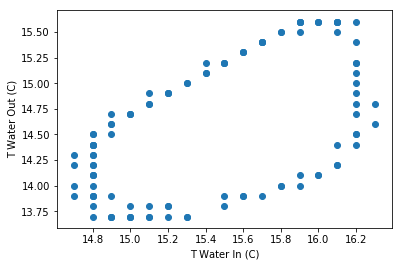

In [28]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

#print(data['T_AMBIENT'],data['T_SET'],data['T_WATER_IN'])
print('T Water Out vs T Water In')
plt.scatter(data[cam_items[2]],data[cam_items[3]])
plt.xlabel('T Water In (C)')
plt.ylabel('T Water Out (C)')
plt.show()
plt.close()

#T_SIPM_TM31, data['SiPM_I_TM%02i' % tm], T_PRI_TMxx, T_AUX_TMxx 

#plt.plot(data['totdt'],data['T_SIPM_TM31'], label='$T_{Water In}$')

# Large Dataset - 15C

T Water In vs T Water Out


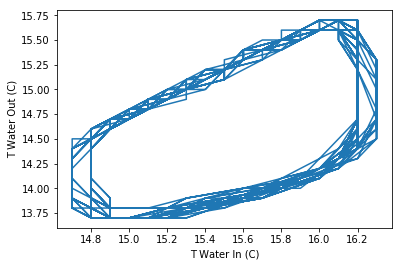

In [35]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller15.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

#print(data['T_AMBIENT'],data['T_SET'],data['T_WATER_IN'])
print ('T Water In vs T Water Out')
plt.plot(data[cam_items[2]],data[cam_items[3]])
plt.xlabel('T Water In (C)')
plt.ylabel('T Water Out (C)')
plt.show()
plt.close()

#T_SIPM_TM31, data['SiPM_I_TM%02i' % tm], T_PRI_TMxx, T_AUX_TMxx 

#plt.plot(data['totdt'],data['T_SIPM_TM31'], label='$T_{Water In}$')

Average T SiPM vs NSB


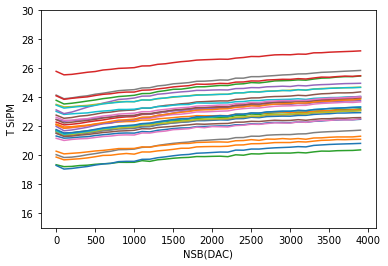

Temp Spread Across Pixels


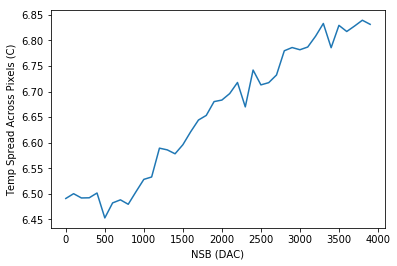

Delta Temp Change Spread per DAC


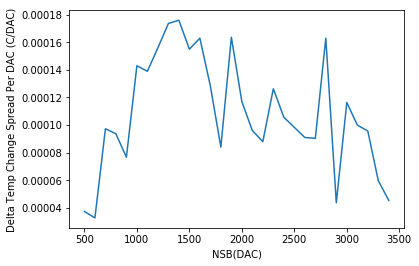

T SiPM over time


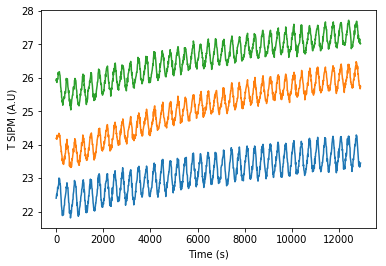

Rate of change of T SiPM per DAC


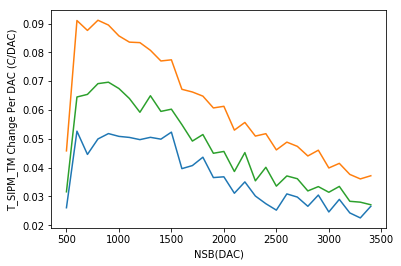

Normalised T SiPM vs DAC


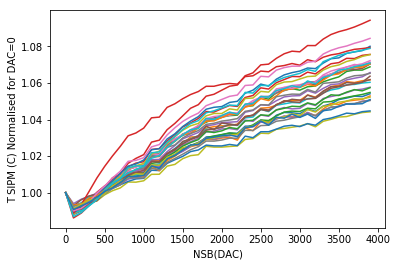

Percentage change of T SiPM relatived to T (DAC=0)


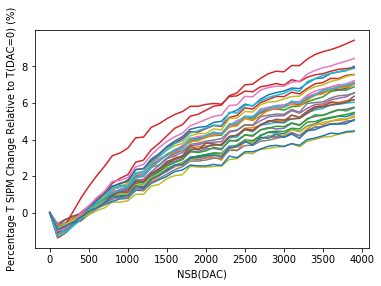

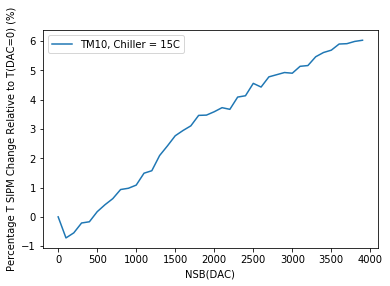

Spread of Normalised Temp Changes across camera vs DAC


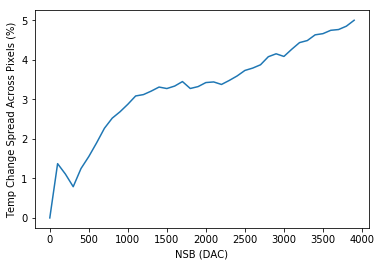

Delta Temp Change Spread per DAC


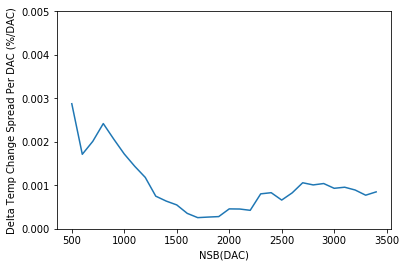

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller15.txt', sep=' ', header=0)
#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 


tstm0=np.zeros((40,32))
#tstm1=np.zeros(41,)
nsb1=np.zeros(40,)
for o in range (0,40):
    for tmc in range (0,32):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]

print('Average T SiPM vs NSB')
plt.plot(nsb1,tstm0)
plt.ylim(15,30)
plt.ylabel('T SiPM')
plt.xlabel('NSB(DAC)')
plt.show()

print('Temp Spread Across Pixels')
tstm0b=np.zeros((40,5))
for o in range (0,40):
    tstm0b[o,0]=min(tstm0[o,0:7])
    tstm0b[o,1]=min(tstm0[o,9:31])
    tstm0b[o,2]=min(tstm0b[o,0:2])
    tstm0b[o,3]=max(tstm0[o,:])
    tstm0b[o,4]=tstm0b[o,3]-tstm0b[o,2]
plt.plot(nsb1,tstm0b[:,4])
plt.ylabel('Temp Spread Across Pixels (C)')
plt.xlabel('NSB (DAC)')
plt.show()
plt.close()

print('Delta Temp Change Spread per DAC')
tstm3=np.zeros((30,2))
for r in range (5,35):
    tstm3[r-5,0]=nsb1[r]
    tstm3[r-5,1]=(tstm0b[r+5,4]-tstm0b[r-5,4])/(nsb1[r+5]-nsb1[r-5])
plt.plot(tstm3[:,0],tstm3[:,1])
plt.ylabel('Delta Temp Change Spread Per DAC (C/DAC)')
plt.xlabel('NSB(DAC)')
plt.show()

print('T SiPM over time')
plt.plot(data['totdt'],data['T_SIPM_TM04'])
plt.plot(data['totdt'],data['T_SIPM_TM14']+2)
plt.plot(data['totdt'],data['T_SIPM_TM20']+4)
plt.xlabel('Time (s)')
plt.ylabel('T SIPM (A.U)')
plt.show()

print('Rate of change of T SiPM per DAC')
tstm0a=np.zeros((30,2))
for r in range (5,35):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,4]-tstm0[r-5,4])/(nsb1[r+5]-nsb1[r-5])    
plt.plot(tstm0a[:,0],100*tstm0a[:,1])
for r in range (5,35):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,14]-tstm0[r-5,14])/(nsb1[r+5]-nsb1[r-5])    
plt.plot(tstm0a[:,0],100*tstm0a[:,1])
for r in range (5,35):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,20]-tstm0[r-5,20])/(nsb1[r+5]-nsb1[r-5])    
plt.plot(tstm0a[:,0],100*tstm0a[:,1])
plt.ylabel('T_SIPM_TM Change Per DAC (C/DAC)')
plt.xlabel('NSB(DAC)')
plt.show()
plt.close()

print('Normalised T SiPM vs DAC')
tmst1=np.zeros((40,32))   
for o in range (0,32):
    for u in range (0,40):
        tmst1[u,o]=tstm0[u,o]/tstm0[0,o]
    if tstm0[0,o]>0:
        #plt.plot(nsb1,tstm0[:,o]/tstm0[0,o])
        plt.plot(nsb1,tmst1[:,o])
plt.xlabel('NSB(DAC)')
plt.ylabel('T SIPM (C) Normalised for DAC=0')
plt.show()
plt.close()

print('Percentage change of T SiPM relatived to T (DAC=0)')
for o in range (0,32):
    if tstm0[0,o]>0:
        plt.plot(nsb1,100*(tmst1[:,o]-1))
plt.xlabel('NSB(DAC)')
plt.ylabel('Percentage T SIPM Change Relative to T(DAC=0) (%)')
plt.show()
plt.close()

plt.plot(nsb1,100*(tmst1[:,10]-1), label='TM10, Chiller = 15C')
plt.xlabel('NSB(DAC)')
plt.ylabel('Percentage T SIPM Change Relative to T(DAC=0) (%)')
plt.legend(loc='upper left')
plt.show()
plt.close()

print('Spread of Normalised Temp Changes across camera vs DAC')
tstm2=np.zeros((40,5))
for o in range (0,40):
    tstm2[o,0]=min(tmst1[o,0:7])
    tstm2[o,1]=min(tmst1[o,9:31])
    tstm2[o,2]=min(tstm2[o,0:2])
    tstm2[o,3]=max(tmst1[o,:])
    tstm2[o,4]=tstm2[o,3]-tstm2[o,2]
plt.plot(nsb1,100*tstm2[:,4])
plt.ylabel('Temp Change Spread Across Pixels (%)')
plt.xlabel('NSB (DAC)')
plt.show()
plt.close()

print('Delta Temp Change Spread per DAC')
tstm3=np.zeros((30,2))
for r in range (5,35):
    tstm3[r-5,0]=nsb1[r]
    tstm3[r-5,1]=(tstm2[r+5,4]-tstm2[r-5,4])/(nsb1[r+5]-nsb1[r-5])
plt.plot(tstm3[:,0],100*tstm3[:,1])
plt.ylabel('Delta Temp Change Spread Per DAC (%/DAC)')
plt.ylim(0,0.005)
plt.xlabel('NSB(DAC)')
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller15.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 

tstm0=np.zeros((40,32))
#tstm1=np.zeros(41,)
nsb1=np.zeros(40,)
for o in range (0,40):
    for tmc in range (0,32):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]
print('T SiPM vs DAC')
plt.plot(data['dt'][0:30],data['T_SIPM_TM00'][0:30], label='TM0, NSB=0DAC, Chiller=8C')
plt.plot(data['dt'][150:180],data['T_SIPM_TM00'][150:180], label='TM0, NSB=500DAC, Chiller=8C')
plt.plot(data['dt'][300:330],data['T_SIPM_TM00'][300:330], label='TM0, NSB=1000DAC, Chiller=8C')
plt.plot(data['dt'][600:630],data['T_SIPM_TM00'][600:630], label='TM0, NSB=2000DAC, Chiller=8C')
plt.plot(data['dt'][1170:1200],data['T_SIPM_TM00'][1170:1200], label='TM0, NSB=3900DAC, Chiller=8C')

plt.xlabel('NSB Time (s)')
plt.ylabel('T SIPM (C)')
plt.ylim(20,25)
plt.legend(loc='upper left')
plt.show()

# Large Dataset - 8C

T Water In vs T Water Out


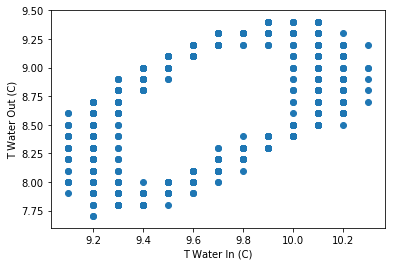

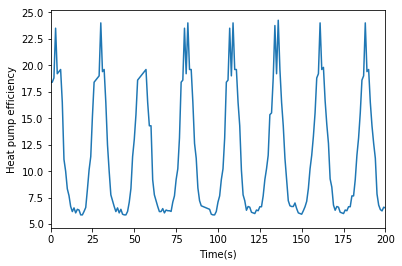

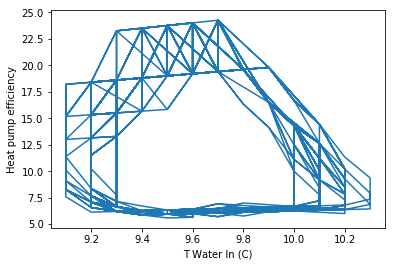

In [111]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

#print(data['T_AMBIENT'],data['T_SET'],data['T_WATER_IN'])
print('T Water In vs T Water Out')
plt.scatter(data[cam_items[2]],data[cam_items[3]])
plt.xlabel('T Water In (C)')
plt.ylabel('T Water Out (C)')
plt.show()
plt.close()

a=data[cam_items[2]]/(data[cam_items[2]]-data[cam_items[3]])
plt.plot(a)
plt.xlabel('Time(s)')
plt.ylabel('Heat pump efficiency')
plt.xlim(0,200)
plt.show()
plt.close()

plt.plot(data[cam_items[2]],a)
plt.xlabel('T Water In (C)')
plt.ylabel('Heat pump efficiency')
plt.show()
#T_SIPM_TM31, data['SiPM_I_TM%02i' % tm], T_PRI_TMxx, T_AUX_TMxx 

#plt.plot(data['totdt'],data['T_SIPM_TM31'], label='$T_{Water In}$')

In [ ]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

#print(data['T_AMBIENT'],data['T_SET'],data['T_WATER_IN'])

#T_SIPM_TM31, data['SiPM_I_TM%02i' % tm], T_PRI_TMxx, T_AUX_TMxx 

#plt.plot(data['totdt'],data['T_SIPM_TM31'], label='$T_{Water In}$')
print('T SiPM vs time')
print('Periodicity in T SiPM due to Chiller temperature')
for tm in range (0,31):
    plt.plot(data['totdt'],data['T_SIPM_TM%02i' % tm])#data['T_SIPM_TM31'])#, label='$T_{Water Out}$')
plt.xlabel('Time (s)')
plt.ylim(12.5,22.5)
#plt.xlim(0,5)
plt.ylabel('T SiPM 31 (C)')
#plt.legend(loc='upper right')
plt.show()
plt.close()

T SiPM vs time


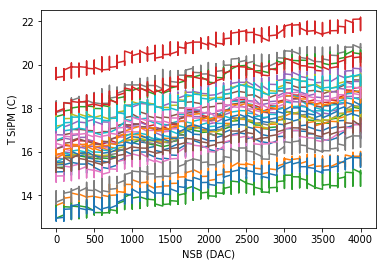

In [112]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

#print(data['T_AMBIENT'],data['T_SET'],data['T_WATER_IN'])

#T_SIPM_TM31, data['SiPM_I_TM%02i' % tm], T_PRI_TMxx, T_AUX_TMxx 

#plt.plot(data['totdt'],data['T_SIPM_TM31'], label='$T_{Water In}$')
print('T SiPM vs time')
for tm in range (0,31):
    plt.plot(data['nsb'],data['T_SIPM_TM%02i' % tm])#data['T_SIPM_TM31'])#, label='$T_{Water Out}$')
plt.xlabel('NSB (DAC)')
plt.ylim(12.5,22.5)
#plt.xlim(0,5)
plt.ylabel('T SiPM (C)')
#plt.legend(loc='upper right')
plt.show()
plt.close()

NSB vs Time


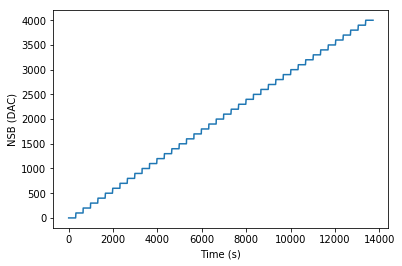

In [114]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

#print(data['T_AMBIENT'],data['T_SET'],data['T_WATER_IN'])

#T_SIPM_TM31, data['SiPM_I_TM%02i' % tm], T_PRI_TMxx, T_AUX_TMxx 
print('NSB vs Time')
#plt.plot(data['totdt'],data['T_SIPM_TM31'], label='$T_{Water In}$')
plt.plot(data['totdt'],data['nsb'])#data['T_SIPM_TM31'])#, label='$T_{Water Out}$')
plt.xlabel('Time (s)')
plt.ylabel('NSB (DAC)')
plt.show()
plt.close()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 

tstm0=np.zeros((41,32))
#tstm1=np.zeros(41,)
nsb1=np.zeros(41,)
for o in range (0,41):
    for tmc in range (0,32):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]

print('Average T SiPM vs NSB')
plt.plot(nsb1,tstm0)
plt.ylim(10,25)
plt.ylabel('T SiPM')
plt.xlabel('NSB(DAC)')
plt.show()

print('Temp Spread Across Pixels')
tstm0b=np.zeros((41,5))
for o in range (0,41):
    tstm0b[o,0]=min(tstm0[o,0:7])
    tstm0b[o,1]=min(tstm0[o,9:31])
    tstm0b[o,2]=min(tstm0b[o,0:2])
    tstm0b[o,3]=max(tstm0[o,:])
    tstm0b[o,4]=tstm0b[o,3]-tstm0b[o,2]
plt.plot(nsb1,tstm0b[:,4])
plt.ylabel('Temp Spread Across Pixels (C)')
plt.xlabel('NSB (DAC)')
plt.show()
plt.close()

print('Delta Temp Change Spread per DAC')
tstm3=np.zeros((31,2))
for r in range (5,36):
    tstm3[r-5,0]=nsb1[r]
    tstm3[r-5,1]=(tstm0b[r+5,4]-tstm0b[r-5,4])/(nsb1[r+5]-nsb1[r-5])
plt.plot(tstm3[:,0],tstm3[:,1])
plt.ylabel('Delta Temp Change Spread Per DAC (C/DAC)')
plt.xlabel('NSB(DAC)')
plt.show()

print('T SiPM over time')
plt.plot(data['totdt'],data['T_SIPM_TM04'])
plt.plot(data['totdt'],data['T_SIPM_TM14']+2)
plt.plot(data['totdt'],data['T_SIPM_TM20']+4)
plt.xlabel('Time (s)')
plt.ylabel('T SIPM (A.U)')
plt.show()

print('Rate of change of T SiPM per DAC')
tstm0a=np.zeros((31,2))
for r in range (5,36):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,4]-tstm0[r-5,4])/(nsb1[r+5]-nsb1[r-5])    
plt.plot(tstm0a[:,0],100*tstm0a[:,1])
for r in range (5,36):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,14]-tstm0[r-5,14])/(nsb1[r+5]-nsb1[r-5])    
plt.plot(tstm0a[:,0],100*tstm0a[:,1])
for r in range (5,36):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,20]-tstm0[r-5,20])/(nsb1[r+5]-nsb1[r-5])    
plt.plot(tstm0a[:,0],100*tstm0a[:,1])
plt.ylabel('T_SIPM_TM4 Change Per DAC (C/DAC)')
plt.xlabel('NSB(DAC)')
plt.show()
plt.close()

tmst1=np.zeros((41,32))   
for o in range (0,32):
    for u in range (0,41):
        tmst1[u,o]=tstm0[u,o]/tstm0[0,o]
    if tstm0[0,o]>0:
        #plt.plot(nsb1,tstm0[:,o]/tstm0[0,o])
        plt.plot(nsb1,tmst1[:,o])
plt.xlabel('NSB(DAC)')
plt.ylabel('T SIPM (C) Normalised for DAC=0')
plt.show()
plt.close()

for o in range (0,32):
    if tstm0[0,o]>0:
        plt.plot(nsb1,100*(tmst1[:,o]-1))
plt.xlabel('NSB(DAC)')
plt.ylabel('Percentage T SIPM Change Relative to T(DAC=0) (%)')
plt.show()
plt.close()

plt.plot(nsb1,100*(tmst1[:,10]-1), label='TM10, Chiller = 8C')
plt.xlabel('NSB(DAC)')
plt.ylabel('Percentage T SIPM Change Relative to T(DAC=0) (%)')
plt.legend(loc='upper left')
plt.show()
plt.close()

tstm2=np.zeros((41,5))
for o in range (0,41):
    tstm2[o,0]=min(tmst1[o,0:7])
    tstm2[o,1]=min(tmst1[o,9:31])
    tstm2[o,2]=min(tstm2[o,0:2])
    tstm2[o,3]=max(tmst1[o,:])
    tstm2[o,4]=tstm2[o,3]-tstm2[o,2]

plt.plot(nsb1,100*tstm2[:,4])
plt.ylabel('Temp Change Spread Across Pixels (%)')
plt.xlabel('NSB (DAC)')
plt.show()
plt.close()

tstm3=np.zeros((31,2))
for r in range (5,36):
    tstm3[r-5,0]=nsb1[r]
    tstm3[r-5,1]=(tstm2[r+5,4]-tstm2[r-5,4])/(nsb1[r+5]-nsb1[r-5])
    
plt.plot(tstm3[:,0],100*tstm3[:,1])
plt.ylabel('Delta Temp Change Spread Per DAC (%/DAC)')
plt.ylim(0,0.005)
plt.xlabel('NSB(DAC)')
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 
print('T SiPM vs DAC')
print('TM0 colder than TM1')
tstm0=np.zeros((41,32))
nsb1=np.zeros(41,)
for o in range (0,41):
    for tmc in range (0,32):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]

for o in range (0,2):  #PICK A TM
    plt.plot(nsb1,tstm0[:,o])

plt.xlabel('NSB(DAC)')
plt.ylabel('T SIPM (C)')
plt.ylim(12,22)
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 

tstm0=np.zeros((41,32))
#tstm1=np.zeros(41,)
nsb1=np.zeros(41,)
for o in range (0,41):
    for tmc in range (0,32):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]

#plt.scatter(data['nsb'],data['T_SIPM_TM00'])
#plt.scatter(data['nsb'][30:60],data['T_SIPM_TM00'][30:60])
#plt.scatter(data['nsb'],data['T_SIPM_TM01'])
#plt.scatter(data['nsb'],data['T_SIPM_TM02'])
#plt.scatter(data['nsb'],data['T_SIPM_TM03'])
#plt.scatter(data['nsb'],data['T_SIPM_TM04'])
print('T SiPM vs DAC')
print('T SiPM0 varies 14.8C to 15.5C at 0NSB')
for o in range (0,1): #41
    plt.plot((data['nsb'][(30*o):(30*o+30)]),(data['T_SIPM_TM00'][(30*o):(30*o+30)]))
    
plt.xlabel('NSB(DAC)')
plt.ylabel('T SIPM (C)')
#plt.ylim(12,22)
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 

tstm0=np.zeros((41,32))
#tstm1=np.zeros(41,)
nsb1=np.zeros(41,)
for o in range (0,41):
    for tmc in range (0,32):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]
print('T SiPM vs DAC')
print('T SiPM increases ~2degrees for each TM. TM1 a lot colder than the others. ')
plt.scatter(data['nsb'],data['T_SIPM_TM00'], label='TM0')
plt.scatter(data['nsb'],data['T_SIPM_TM01'], label='TM1')
plt.scatter(data['nsb'],data['T_SIPM_TM02'], label='TM2')
plt.scatter(data['nsb'],data['T_SIPM_TM03'], label='TM3')
plt.scatter(data['nsb'],data['T_SIPM_TM04'], label='TM4')
    
plt.xlabel('NSB(DAC)')
plt.ylabel('T SIPM (C)')
plt.ylim(12,22)
plt.legend(loc='upper left')
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 
print('TSiPM vs time')
print('TSiPM varies with time. ~2C increase to 4000DAC. Periodicity independent of NSB, related to Twaterin/Twaterout')
tstm0=np.zeros((41,32))
#tstm1=np.zeros(41,)
nsb1=np.zeros(41,)
for o in range (0,41):
    for tmc in range (0,32):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]
plt.plot(data['dt'][0:30],data['T_SIPM_TM00'][0:30], label='TM0, NSB=0DAC, Chiller=8C')
plt.plot(data['dt'][150:180],data['T_SIPM_TM00'][150:180], label='TM0, NSB=500DAC, Chiller=8C')
plt.plot(data['dt'][300:330],data['T_SIPM_TM00'][300:330], label='TM0, NSB=1000DAC, Chiller=8C')
plt.plot(data['dt'][600:630],data['T_SIPM_TM00'][600:630], label='TM0, NSB=2000DAC, Chiller=8C')
plt.plot(data['dt'][1200:1230],data['T_SIPM_TM00'][1200:1230], label='TM0, NSB=4000DAC, Chiller=8C')

plt.plot(data['dt'][0:30],data['T_WATER_IN'][0:30]+8, label='T WATER IN')
plt.plot(data['dt'][0:30],data['T_WATER_OUT'][0:30]+8, label='T WATER OUT')

plt.xlabel('NSB Time (s)')
plt.ylabel('T SIPM (C)')
plt.ylim(14.5,22.5)
plt.legend(loc='upper left')
plt.show()
'''
a=np.zeros((30,3))
for i in range (0,30):
    a[i,0]=data['T_WATER_IN'][i]
    a[i,1]=data['T_SIPM_TM00'][300+i]
    a[i,2]=data['T_SIPM_TM00'][1200+i]
a0m=max(a[:,0])
a1m=max(a[:,1])
a2m=max(a[:,2])
a0n=min(a[:,0])
a1n=min(a[:,1])
a2n=min(a[:,2])
#for j in range (0,3):
#    a[:,j]=a[:,j]-a[0,j]
b=(a[:,0]-(0.5*(a0m+a0n)))/(0.5*(a0m-a0n))
b=b-min(b)-1
c=(a[:,1]-(0.5*(a1m+a1n)))/(0.5*(a1m-a1n))
c=c-min(c)-1
d=(a[:,2]-(0.5*(a2m+a2n)))/(0.5*(a2m-a2n))
print(max(d))
print(min(d))
plt.plot(data['dt'][0:30],b, label=0)
plt.plot(data['dt'][0:30],c, label=1)
plt.plot(data['dt'][0:30],d, label=2)
e=np.zeros((len(b),))
f=e
g=e
for o in range (0,len(b)):
    e[o]=math.acos(b[o])
    f[o]=math.acos(c[o])
    g[o]=math.acos(d[o])
plt.plt(data['dt'][0:30],e)
plt.plt(data['dt'][0:30],f)
plt.plt(data['dt'][0:30],g)
plt.legend(loc='upper left')
plt.show()
print('More work to do. Looks like NSB induced temp change stable, but cycles depending on chiller temp.')
'''

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd
import math

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 

tstm0=np.zeros((41,32))
#tstm1=np.zeros(41,)
nsb1=np.zeros(41,)
for o in range (0,41):
    for tmc in range (0,32):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]
print('T SiPM/TWaterin vs time')
print('Periodicity independent of NSB. Sinusoidal relationship noisier than TSiPM/TWaterOut')

plt.plot(data['dt'][0:30]+80,data['T_SIPM_TM00'][0:30]/data['T_WATER_IN'][0:30], label='TM0, NSB=0DAC, Chiller=8C')
plt.plot(data['dt'][150:180],data['T_SIPM_TM00'][150:180]/data['T_WATER_IN'][150:180], label='TM0, NSB=500DAC, Chiller=8C')
plt.plot(data['dt'][300:330],data['T_SIPM_TM00'][300:330]/data['T_WATER_IN'][300:330], label='TM0, NSB=1000DAC, Chiller=8C')
plt.plot(data['dt'][600:630],data['T_SIPM_TM00'][600:630]/data['T_WATER_IN'][600:630], label='TM0, NSB=2000DAC, Chiller=8C')
plt.plot(data['dt'][1200:1230]+40,data['T_SIPM_TM00'][1200:1230]/data['T_WATER_IN'][1200:1230], label='TM0, NSB=4000DAC, Chiller=8C')

a0=np.zeros((30,2))
a1=np.zeros((30,2))
a2=np.zeros(30,)
for ac in range (600,630):
    a0[ac-600,0]=data['T_SIPM_TM00'][ac]
    a0[ac-600,1]=data['T_WATER_IN'][ac]
for ac in range (150,180):    
    a1[ac-150,0]=(data['T_SIPM_TM00'][ac])
    a1[ac-150,1]=data['T_WATER_IN'][ac]
for ac in range (0,30):
    a2[ac]=(a0[ac,0]/a0[ac,1])-(a1[ac,0]/a1[ac,1])

plt.scatter(data['dt'][150:180],a2, label='DAC2000-DAC500')
plt.xlabel('NSB Time (s)')
plt.ylabel('T SIPM/ T WATER IN')
plt.legend(loc='upper left')
plt.ylim(1.5,1.95)
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd
import math

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 

tstm0=np.zeros((41,32))
#tstm1=np.zeros(41,)
nsb1=np.zeros(41,)
for o in range (0,41):
    for tmc in range (0,32):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]
print('T SiPM/Twaterout vs time')
print('Sinusoidal relationship between temperature and time, periodicity independent of NSB')

plt.plot(data['dt'][0:30]+80,data['T_SIPM_TM00'][0:30]/data['T_WATER_OUT'][0:30], label='TM0, NSB=0DAC, Chiller=8C')
plt.plot(data['dt'][150:180],data['T_SIPM_TM00'][150:180]/data['T_WATER_OUT'][150:180], label='TM0, NSB=500DAC, Chiller=8C')
plt.plot(data['dt'][300:330],data['T_SIPM_TM00'][300:330]/data['T_WATER_OUT'][300:330], label='TM0, NSB=1000DAC, Chiller=8C')
plt.plot(data['dt'][600:630],data['T_SIPM_TM00'][600:630]/data['T_WATER_OUT'][600:630], label='TM0, NSB=2000DAC, Chiller=8C')
plt.plot(data['dt'][1200:1230]+40,data['T_SIPM_TM00'][1200:1230]/data['T_WATER_OUT'][1200:1230], label='TM0, NSB=4000DAC, Chiller=8C')

a0=np.zeros((30,2))
a1=np.zeros((30,2))
a2=np.zeros(30,)
for ac in range (600,630):
    a0[ac-600,0]=data['T_SIPM_TM00'][ac]
    a0[ac-600,1]=data['T_WATER_OUT'][ac]
for ac in range (150,180):    
    a1[ac-150,0]=(data['T_SIPM_TM00'][ac])
    a1[ac-150,1]=data['T_WATER_OUT'][ac]
for ac in range (0,30):
    a2[ac]=(a0[ac,0]/a0[ac,1])-(a1[ac,0]/a1[ac,1])

plt.scatter(data['dt'][150:180],a2, label='DAC2000-DAC500')
plt.xlabel('NSB Time (s)')
plt.ylabel('T SIPM /T WATER OUT')
plt.legend(loc='upper left')
plt.ylim(1.6,2.3)
plt.show()

# Comparison

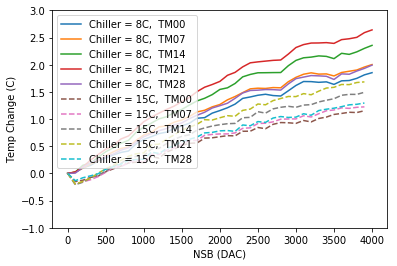

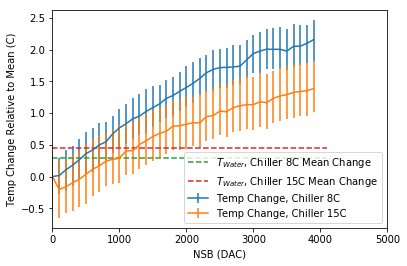

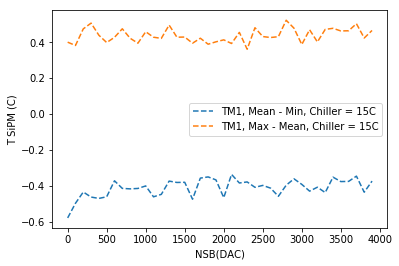

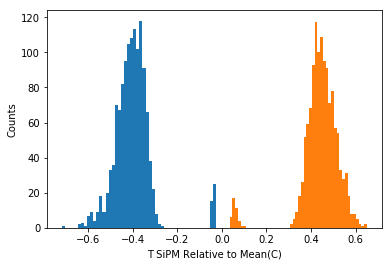

Temp Spread Across Pixels
The spread of temperatures across the pixels gets wider as the NSB increases


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [110]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import pandas as pd

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 

tstm0=np.zeros((41,32))
#tstm1=np.zeros(41,)
nsb1=np.zeros(41,)
for tmc in range (0,32):
    for o in range (0,41):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
        nsb1[o]=data['nsb'][30*o]
for tmc in range (0,5):
    tmcc=7*tmc
    a=(tstm0[:,tmc]-tstm0[0,tmc])
    plt.plot(nsb1,a, label='Chiller = 8C,  TM%02i' % tmcc)

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller15.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

tstm0=np.zeros((41,32))
#tstm1=np.zeros(41,)
for tmc in range (0,32):
    for o in range (0,41):
        tstm0[o,tmc]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
for tmc in range (0,5):
    tmcc=7*tmc
    a=(tstm0[:,tmc]-tstm0[0,tmc])
    plt.plot(nsb1,a, ls='dashed', label='Chiller = 15C,  TM%02i' % tmcc)

plt.xlabel('NSB (DAC)')
plt.ylabel('Temp Change (C)')
plt.ylim(-1,3)
plt.legend(loc='best')
plt.show()
plt.close()


    
#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_smallscan.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

    

tstm0b=np.zeros((41,5))
for o in range (0,41):
    tstm0b[o,0]=min(tstm0[o,0:7])
    tstm0b[o,1]=min(tstm0[o,9:31])
    tstm0b[o,2]=min(tstm0b[o,0:2])
    tstm0b[o,3]=max(tstm0[o,:])
    tstm0b[o,4]=tstm0b[o,3]-tstm0b[o,2]

tstm3=np.zeros((30,2))
for r in range (5,35):
    tstm3[r-5,0]=nsb1[r]
    tstm3[r-5,1]=(tstm0b[r+5,4]-tstm0b[r-5,4])/(nsb1[r+5]-nsb1[r-5])
    
tstm0a=np.zeros((31,2))
for r in range (5,36):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,4]-tstm0[r-5,4])/(nsb1[r+5]-nsb1[r-5])    
for r in range (5,36):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,14]-tstm0[r-5,14])/(nsb1[r+5]-nsb1[r-5])    
for r in range (5,36):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,20]-tstm0[r-5,20])/(nsb1[r+5]-nsb1[r-5])    

tmst1=np.zeros((41,32))   
for o in range (0,32):
    for u in range (0,41):
        tmst1[u,o]=tstm0[u,o]/tstm0[0,o]

tmst1c=tmst1
tmst0c=tstm0b
nsb1c=nsb1
tstm3c=tstm3
######################

#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller15.txt', sep=' ', header=0)
data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']

nsb1 = np.arange(0, 4100, 100) 

tstm0=np.zeros((40,32,3))
#tstm1=np.zeros(41,)
nsb1=np.zeros(40,)
for o in range (0,40):
    for tmc in range (0,32):
        tstm0[o,tmc,0]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        tstm0[o,tmc,1]=np.min(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        tstm0[o,tmc,2]=np.max(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]
tx=np.mean(tstm0, axis=1)
el=abs((tx[:,1]-tx[:,0]))
eu=abs((tx[:,2]-tx[:,0]))
plt.errorbar(nsb1,tx[:,0]-tx[0,0],yerr=(el,eu), label='Temp Change, Chiller 8C')

data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller15.txt', sep=' ', header=0)
#data = pd.read_table('/Users/chec/Desktop/CHECData/Temperature_vs_NSB/data/results_d2018-12-05_chiller08.txt', sep=' ', header=0)
tm_items = ['T_SIPM', 'T_PRI', 'T_AUX', 'SiPM_I']
cam_items = ['T_AMBIENT', 'T_SET', 'T_WATER_IN', 'T_WATER_OUT', 'SB_TMON_EX2', 'SB_TMON_EX3', 'SB_TMON_EX4', 'SB_TMON_EX5', 'SB_TMON_FAN1', 'PSU_TEMP_BD_MOD', 'PSU_TEMP_SB_MOD', 'PSU_TEMP_35V1_MOD', 'PSU_TEMP_35V2_MOD', 'T_DACQ1', 'T_DACQ2']
tstm0=np.zeros((40,32,3))
#tstm1=np.zeros(41,)
nsb1=np.zeros(40,)
for o in range (0,40):
    for tmc in range (0,32):
        tstm0[o,tmc,0]=np.mean(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        tstm0[o,tmc,1]=np.min(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        tstm0[o,tmc,2]=np.max(data['T_SIPM_TM%02i' % tmc][(30*o):(30*o+30)])
        #tstm1[o]=np.mean(data['T_SIPM_TM01'][(30*o):(30*o+30)])
    nsb1[o]=data['nsb'][30*o]
ty=np.mean(tstm0, axis=1)
#plt.plot(nsb1,ty[:,0]-ty[0,0], label='Chiller 15C, Mean')
el=abs((ty[:,1]-ty[:,0]))
eu=abs((ty[:,2]-ty[:,0]))
plt.errorbar(nsb1,ty[:,0]-ty[0,0],yerr=(el,eu), label='Temp Change, Chiller 15C')
#plt.plot(nsb1,ty[:,1]-ty[0,0], label='Chiller 15C, Min')
#plt.plot(nsb1,ty[:,2]-ty[0,0], label='Chiller 15C, Max')

nx=[0,4100]
ny=[0.3, 0.3]
plt.plot(nx,ny, ls='dashed', label='$T_{Water}$, Chiller 8C Mean Change')

nx=[0,4100]
ny=[0.45, 0.45]
plt.plot(nx,ny, ls='dashed', label='$T_{Water}$, Chiller 15C Mean Change')

plt.xlabel('NSB (DAC)')
plt.ylabel('Temp Change Relative to Mean (C)')
plt.legend(loc='lower right')
plt.xlim(0,5000)
plt.show()
plt.close()



'''
print('Average T SiPM vs NSB')
print('~2 degree increase over NSB=4000DAC')
plt.plot(nsb1,tstm0[:,1,0]-tstm0[0,1,0], label='TM1, Chiller = 15C')
plt.plot(nsb1c,tmst0c[:,1]-tmst0c[0,1], label='TM1, Chiller = 8C')
'''
#plt.plot(nsb1,tstm0[:,1,0]-tstm0[:,1,0], label='TM1, Mean, Chiller = 15C')
plt.plot(nsb1,tstm0[:,1,1]-tstm0[:,1,0], ls='dashed', label='TM1, Mean - Min, Chiller = 15C')
plt.plot(nsb1,tstm0[:,1,2]-tstm0[:,1,0], ls='dashed', label='TM1, Max - Mean, Chiller = 15C')
plt.ylabel('T SiPM (C)')
plt.xlabel('NSB(DAC)')
plt.legend(loc='left')
plt.show()
plt.close()

ca=np.zeros((40,32))
cb=np.zeros((40,32))
for i in range (0,40):
    for j in range (0,32):
        #print(i, j, tstm0[i,j,1], tstm0[i,j,0])
        ca[i,j]=(tstm0[i,j,1]-tstm0[i,j,0])
        cb[i,j]=(tstm0[i,j,2]-tstm0[i,j,0])
#print(cb.shape)
ca=ca.flatten()
cb=cb.flatten()
#print(cb.shape)
plt.hist(ca, bins=50, label='Mean - Min, Chiller = 15C')
plt.hist(cb, bins=50, label='Max-Mean, Chiller = 15C')
plt.xlabel('T SiPM Relative to Mean(C)')
plt.ylabel('Counts')
#plt.ylim(0,20)
plt.show()


print('Temp Spread Across Pixels')
print('The spread of temperatures across the pixels gets wider as the NSB increases')
tstm0b=np.zeros((40,5))
for o in range (0,40):
    tstm0b[o,0]=min(tstm0[o,0:7])
    tstm0b[o,1]=min(tstm0[o,9:31])
    tstm0b[o,2]=min(tstm0b[o,0:2])
    tstm0b[o,3]=max(tstm0[o,:])
    tstm0b[o,4]=tstm0b[o,3]-tstm0b[o,2]
plt.scatter(nsb1,tstm0b[:,4], label='TM4, Chiller = 15C')
plt.scatter(nsb1c,tmst0c[:,4], label='TM4, Chiller = 8C')
plt.ylabel('Temp Spread Across Pixels (C)')
plt.xlabel('NSB (DAC)')
plt.legend(loc='upper left')
plt.show()

print('Delta Temp Change Spread per DAC')
print('Rate of change of temp spread per DAC greatest at 1250DAC')
tstm3=np.zeros((30,2))
for r in range (5,35):
    tstm3[r-5,0]=nsb1[r]
    tstm3[r-5,1]=(tstm0b[r+5,4]-tstm0b[r-5,4])/(nsb1[r+5]-nsb1[r-5])
plt.plot(tstm3[:,0],tstm3[:,1], label='Chiller = 15C')
plt.plot(tstm3c[:,0],tstm3c[:,1], label='Chiller = 8C')
plt.ylabel('Delta Temp Change Spread Per DAC (C/DAC)')
plt.xlabel('NSB(DAC)')
plt.legend(loc='upper right')
plt.show() 

print('Tspread, normalised to 1 at NSB DAC=0')
print('Relative increase in 8C ~2x greater than 15C')
tstm0a=np.zeros((30,2))
for r in range (5,35):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,4]-tstm0[r-5,4])/(nsb1[r+5]-nsb1[r-5])    
#plt.plot(tstm0a[:,0],100*tstm0a[:,1])
for r in range (5,35):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,14]-tstm0[r-5,14])/(nsb1[r+5]-nsb1[r-5])    
#plt.plot(tstm0a[:,0],100*tstm0a[:,1])
for r in range (5,35):
    tstm0a[r-5,0]=nsb1[r]
    tstm0a[r-5,1]=(tstm0[r+5,20]-tstm0[r-5,20])/(nsb1[r+5]-nsb1[r-5])    

tmst1=np.zeros((40,32))   
for o in range (0,32):
    for u in range (0,40):
        tmst1[u,o]=tstm0[u,o]/tstm0[0,o]
    #if tstm0[0,o]>0:
        #plt.plot(nsb1,tstm0[:,o]/tstm0[0,o])
        #plt.plot(nsb1,tmst1[:,o])
plt.plot(nsb1,tmst1[:,10], label='TM10, Chiller = 15C')
plt.plot(nsb1c,tmst1c[:,10], label='TM10, Chiller = 8C')
plt.xlabel('NSB(DAC)')
plt.ylabel('T SIPM (C) Normalised for DAC=0')
plt.legend(loc='upper left')
plt.show()
plt.close()



# TO DO

- Any further calculations?<br>
- Functionality?<br>